In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [7]:
#!wget https://d.pq02.com/jane-street-market-prediction/train.csv -O train.csv

# getting example test set
#!wget https://d.pq02.com/jane-street-market-prediction/example_test.csv -O example_test.csv

# getting example sub
#!wget https://d.pq02.com/jane-street-market-prediction/example_sample_submission.csv -O example_sample_submission.csv.csv

## feature
#!wget https://d.pq02.com/jane-street-market-prediction/features.csv -O features.csv

In [8]:
#!pip install datatable

In [9]:
#!cp train.csv /content/drive/MyDrive/JaneStreet

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/JaneStreet/train.csv')
#data_dt = dt.fread('/content/drive/MyDrive/JaneStreet/train.csv')
#data = data_dt.to_pandas()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/JaneStreet/train.csv'

In [3]:
import pandas as pd
data = pd.read_csv('train.csv')

In [4]:
!pip install dabl

Looking in indexes: https://pypi.python.org/simple
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



Target looks like regression
Showing only top 10 of 134 continuous features


C:\Users\kylej\AppData\Roaming\Python\Python38\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column resp.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\kylej\AppData\Roaming\Python\Python38\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 12 outliers in column resp_2.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\kylej\AppData\Roaming\Python\Python38\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 13 outliers in column resp_1.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\kylej\AppData\Roaming\Python\Python38\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


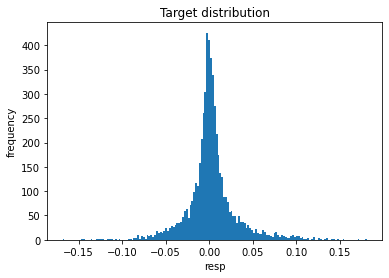

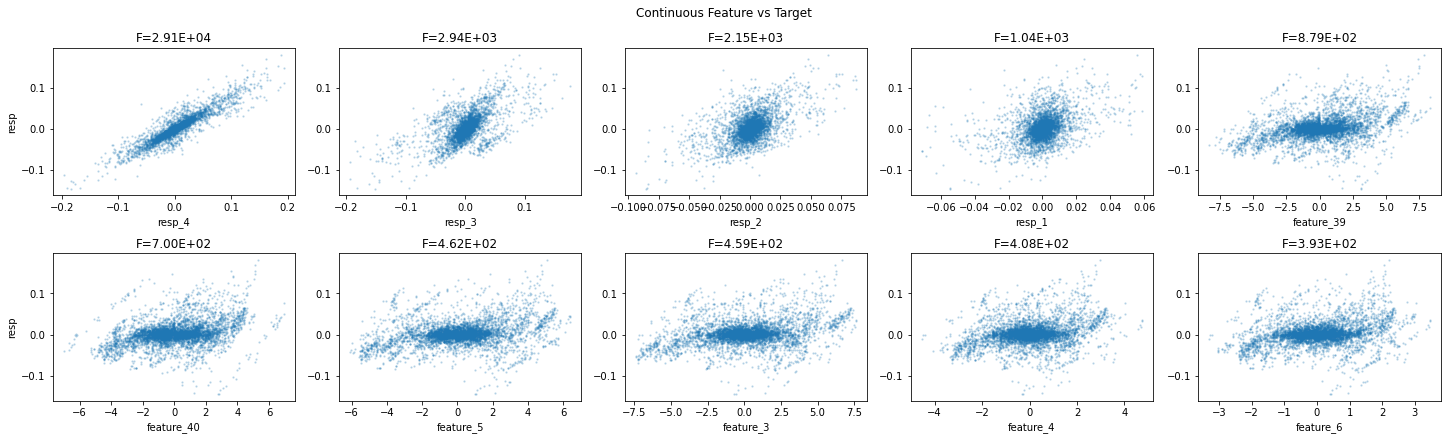

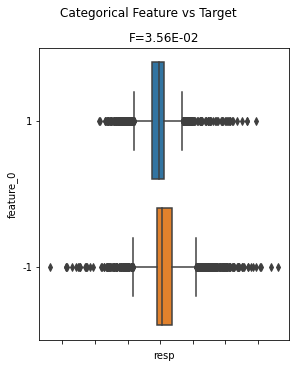

In [6]:
import dabl
dabl.plot(data.loc[data['date'] == 0],target_col='resp')

In [ ]:
dabl.plot(data.loc[data['date'] == 200],target_col='resp')

In [ ]:
dabl.plot(data.loc[data['date'] == 0],target_col='resp', )

In [7]:
sc = dabl.SimpleClassifier().fit(X_train, y_train)

NameError: name 'plt' is not defined

In [8]:
train_0  = data.loc[data['date'] == 0]
train_500  = data.loc[data['date'] == 500]
train_0_and_500 = pd.concat([train_0, train_500])
corr_matrix = train_0_and_500.corr(method='pearson')
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in corr_matrix.columns if all(corr_matrix[column].abs() < 0.6)]
#corr_matrix.drop(to_drop, axis=1, inplace=True)
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2).set_properties(**{'max-width': '80px', 'font-size': '10pt'})

In [ ]:
subset = train_0_and_500[["feature_17","feature_18","feature_19","feature_20","feature_21","feature_22","feature_23","feature_24","feature_25","feature_26","feature_27","feature_28","feature_29","feature_30","feature_31","feature_32","feature_33","feature_34","feature_35","feature_36","feature_37","feature_38","feature_39","feature_40","feature_120","feature_121","feature_122","feature_123","feature_124","feature_125","feature_126","feature_127","feature_128","feature_129"]]
subset.corr(method='pearson').style.background_gradient(cmap='coolwarm', low=1, high=0, axis=None).set_precision(2).set_properties(**{'max-width': '80px', 'font-size': '10pt'})

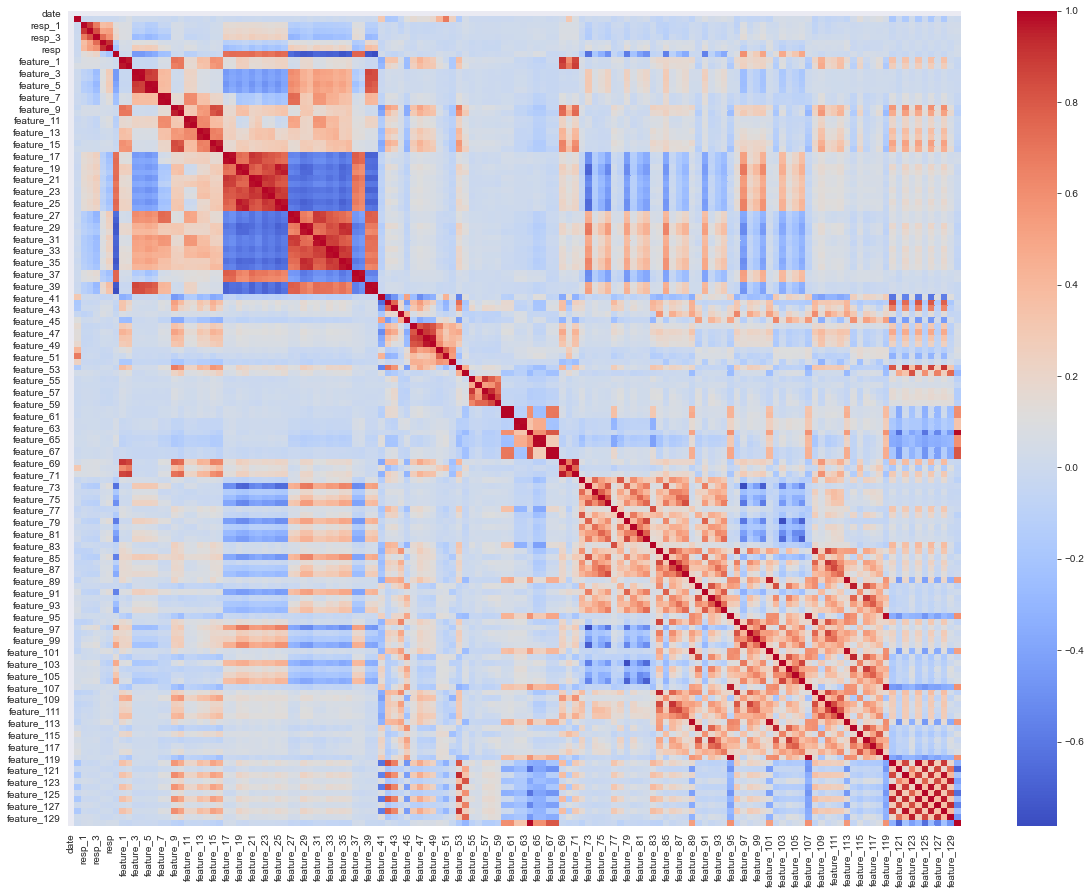

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1,1,1)
sns.heatmap(corr_matrix,ax= ax, cmap='coolwarm');

In [ ]:
#Credit: https://izziswift.com/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas/
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(train_0_and_500, 0.95).to_frame()